In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating location vectors
mean0 = [0, 1]
mean1 = [1, 0]
cov = [[1, 0], [0, 1]]

np.random.seed(5) # to fix the location vectors
lv0_x, lv0_y = np.random.multivariate_normal(mean0, cov, 8).T
lv0 = np.vstack((lv0_x, lv0_y)).T
lv1_x, lv1_y = np.random.multivariate_normal(mean1, cov, 8).T
lv1 = np.vstack((lv1_x, lv1_y)).T

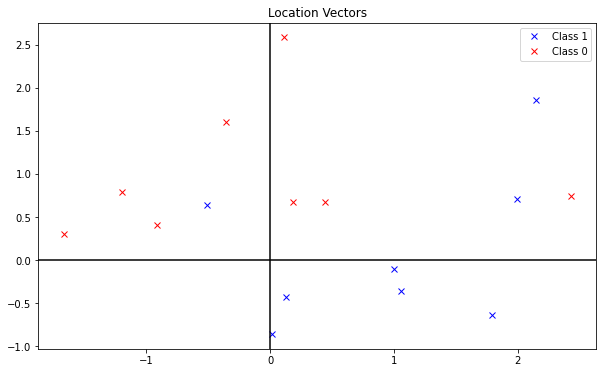

In [3]:
plt.plot(lv1_x, lv1_y, 'x', color='b', label='Class 1');
plt.plot(lv0_x, lv0_y, 'x', color='r', label='Class 0');
plt.title("Location Vectors");
plt.legend();
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

Any linear combination of independent multivariate normals of the same dimension is also multivariate normal (we will use this fact in the next function defintion). Therefore, if we assume $X$ and $Y$ are independent then
$$
Z_{p}=p X+(1-p) Y \sim \mathcal{N}\left(p \mu_{X}+(1-p) \mu_{Y}, p^{2} \Sigma_{X}+(1-p)^{2} \Sigma_{Y}\right)
$$


In [4]:
def generate_points(lv0, lv1, num_points, omega, sigma2, pi):
    """
    generates a sample of num_points points from a density
    defined as the omega weighted mean of bivariate gaussians
    with means given in lv (location vectors) and covariance
    given by sigma2. pi*num_points points belong to class 1 and 
    (1-pi)*num_points points belong to class 0
    """
    assert num_points%2 == 0
    output_x = np.zeros((num_points, 2))
    output_y = np.zeros(num_points)
    output_y[num_points//2:] = [1]*(num_points//2)
    cov = [[sigma2, 0], [0, sigma2]]
    k = lv0.shape[0]
    
    # for class 0
    for i in range(int(num_points/2)):
        xvalue, yvalue = 0, 0
        for j in range(k):
            x, y = np.random.multivariate_normal(lv0[j], cov, 1).T
            xvalue += omega[j]*x
            yvalue += omega[j]*y
        output_x[i][0], output_x[i][1] = (1-pi)*xvalue, (1-pi)*yvalue
    
    # for class 1
    for i in range(num_points//2, num_points):
        xvalue, yvalue = 0, 0
        for j in range(k):
            x, y = np.random.multivariate_normal(lv1[j], cov, 1).T
            xvalue += omega[j]*x
            yvalue += omega[j]*y
        output_x[i][0], output_x[i][1] = (pi)*xvalue, (pi)*yvalue
        
    return output_x, output_y

In [5]:
# generate training and test data

pi = 0.5
k = lv0.shape[0]
omega = [1/k]*k
sigma2 = 0.25

np.random.seed(5)
xtrain, ytrain = generate_points(lv0, lv1, 300, omega, sigma2, pi)
xtest, ytest = generate_points(lv0, lv1, 20000, omega, sigma2, pi)

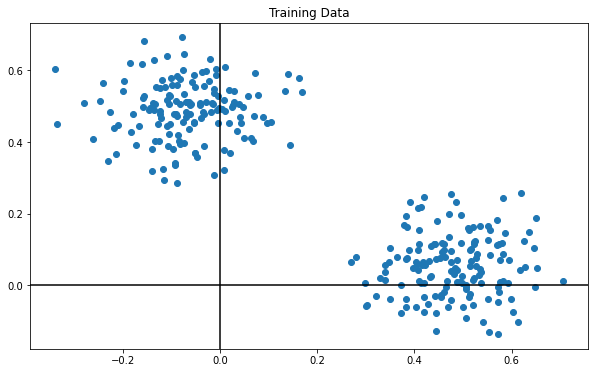

In [6]:
plt.scatter(xtrain[:,0], xtrain[:,1])
plt.title("Training Data");
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

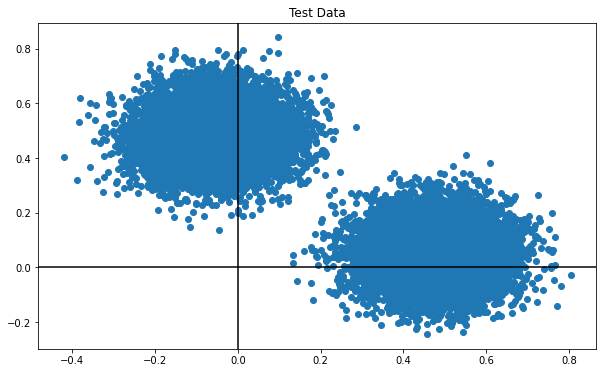

In [7]:
plt.scatter(xtest[:,0], xtest[:,1])
plt.title("Test Data");
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);